<a href="https://colab.research.google.com/github/rutokevin/ML-DS/blob/main/imageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow version: 2.15.0
313/313 [==============================] - 1s 2ms/step - loss: 0.4490 - accuracy: 0.8351
The loass: 0.44899311661720276, The accuracy: 0.835099995136261
313/313 [==============================] - 1s 2ms/step
[0.08837712 0.08837506 0.08837637 0.08837772 0.08838049 0.10084746
 0.08837593 0.10730907 0.08852134 0.17305945]
9
9


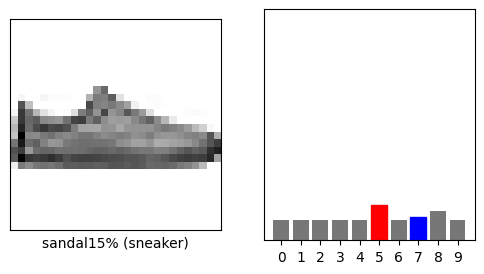

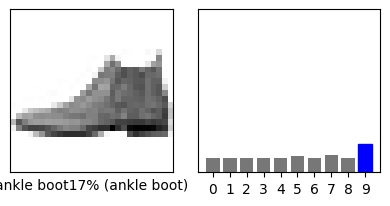

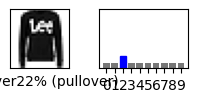

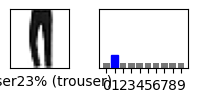

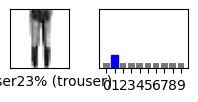

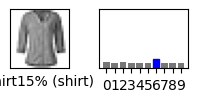

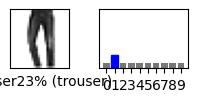

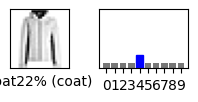

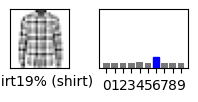

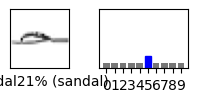

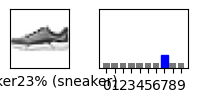

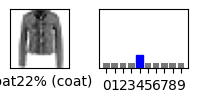

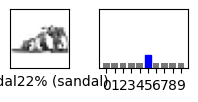

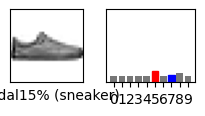

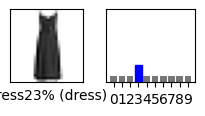

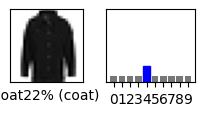

In [ ]:

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
print("TensorFlow version:", tf.__version__)

fashion_mnist =tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

class_names = ['Tshirt/top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']
# print(class_names)
# train_images.shape
# len(train_labels)
# #preprocessing data
# plt.figure()
# plt.imshow(train_images[0])
# plt.colorbar()
# plt.grid(False)
# plt.show()
train_images = train_images/255.0
test_images = test_images/255.0
# plt.figure(figsize=(10,10))
# for i in range(25):
#   plt.subplot(5,5, i+1)
#   plt.xticks([])
#   plt.yticks([])
#   plt.grid(False)
#   plt.imshow(train_images[i],
#   cmap=plt.cm.binary)
#   plt.xlabel(class_names[train_labels[i]])
# plt.show()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
#compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#train the dataset
model.fit(train_images, train_labels, epochs=1)

loss, acc = model.evaluate(test_images, test_labels)
print("The loass: {0}, The accuracy: {1}".format(loss, acc))
#optimizers, loss function, metrics

probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
#predictions[0]
print(predictions[0])
#np.argmax(predictions[0])
#test_labels[0]
print(np.argmax(predictions[0]))
print(test_labels[0])

def plot_image(i, predictions_array, true_label, img):
  true_label,img=true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap=plt.cm.binary)
  predicted_label =np.argmax(predictions_array)
  if predicted_label == true_label:
     color='blue'
  else:
    color='red'

  plt.xlabel("{}{:2.0f}% ({})".
  format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label],color=color))

def  plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range (10),predictions_array,color ='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color("blue")

#verifying prediction
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

#use several images
num_rows = 5
num_cols = 3
num_of_images = num_cols*num_rows
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_of_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions[i],test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions[i],test_labels)
    plt.tight_layout()
    plt.show()


